<a href="https://colab.research.google.com/github/financieras/math/blob/main/regresion/regresion_lineal01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recta de regresión
Ejercicio de regresión lineal simple con un ajuste por mínimos cuadrados ordinarios.


## Etapa 1. Generación aleatoria del dataset
Generar un dataset con datos generados de forma aleatoria para obtener una nube de puntos entre dos variables:
    - la variable `y` (variable dependiente) es el precio de un automóvil de segunda mano y
    - la variable `x` (variable independiente) es el número de Kilómetros que tiene ese coche.
- Generamos 100 parejas de datos.

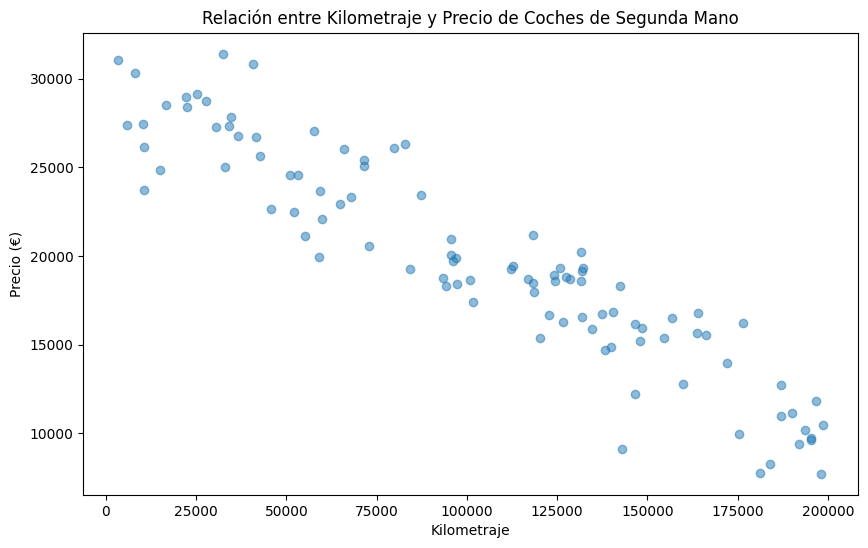

Primeras 5 parejas de datos (Kilometraje, Precio):
(42670, 25640.70)
(131782, 16564.83)
(140417, 16817.30)
(126673, 16268.55)
(71583, 25418.07)


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Configurar la semilla aleatoria para reproducibilidad
np.random.seed()

# Generar 100 valores aleatorios para el kilometraje (variable independiente x)
# Asumimos que los coches tienen entre 0 y 200,000 km
x = np.random.uniform(0, 200000, 100)

# Generar los precios (variable dependiente y) basados en el kilometraje
# Usamos una relación lineal con algo de ruido aleatorio
# Asumimos que un coche nuevo cuesta alrededor de 30,000 y pierde valor con el kilometraje
y = 30000 - 0.1 * x + np.random.normal(0, 2000, 100)

# Asegurémonos de que no hay precios menores a 2500
y = np.maximum(y, 2500)

# Visualizar los datos generados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Kilometraje')
plt.ylabel('Precio (€)')
plt.title('Relación entre Kilometraje y Precio de Coches de Segunda Mano')
plt.show()

# Imprimir las primeras 5 parejas de datos
print("Primeras 5 parejas de datos (Kilometraje, Precio):")
for i in range(5):
    print(f"({x[i]:.0f}, {y[i]:.2f})")



## Etapa 2. Estimación de la recta de regresión
Realizar la estimación de la recta de regresión usando dos métodos.
    - Método 1: usando una librería que tenga alguna función que me de directamente el resultado de los parámetros estimados de la recta de regresión.
    - Método 2: Si usar librería, haciendo directamente los cálculos.

### Etapa2. Método1.
* Consiste en realizar la estimación de la recta de regresión utilizando una librería que proporcione directamente los parámetros estimados.
* Para este método, utilizaremos la librería `sklearn` (Scikit-learn), que es muy popular para tareas de aprendizaje automático en Python.

Este código hace lo siguiente:
    1. Importa las clases y funciones necesarias de sklearn.
    2. Reshape 'x' para que sea una matriz 2D, como lo requiere sklearn.
    3. Crea un modelo de regresión lineal y lo ajusta a los datos.
    4. Extrae la pendiente y el intercepto del modelo ajustado.
    5. Calcula el coeficiente de determinación R².
    6. Imprime los resultados, incluyendo la ecuación de la recta de regresión.
    7. Genera predicciones para todos los puntos X, que se utilizarán para graficar la línea de regresión en la Etapa 3.

* Este método proporciona no solo los parámetros de la recta de regresión, sino también una medida de la bondad del ajuste (R²).

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Asumimos que ya tenemos los datos 'x' e 'y' de la Etapa 1

# Reshape x para que sea una matriz 2D (requerido por sklearn)
X = x.reshape(-1, 1)

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los parámetros de la recta de regresión
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_

# Calcular el coeficiente de determinación R²
r_cuadrado = r2_score(y, modelo.predict(X))

# Imprimir los resultados
print("Resultados de la regresión lineal (sklearn):")
print(f"Pendiente (β1): {pendiente:.4f}")
print(f"Intercepto (β0): {intercepto:.4f}")
print(f"Ecuación de la recta: y = {pendiente:.4f}x + {intercepto:.4f}")
print(f"Coeficiente de determinación (R²): {r_cuadrado:.4f}")

# Generar predicciones para la línea de regresión
y_pred = modelo.predict(X)

Resultados de la regresión lineal (sklearn):
Pendiente (β1): -0.0991
Intercepto (β0): 29953.8507
Ecuación de la recta: y = -0.0991x + 29953.8507
Coeficiente de determinación (R²): 0.8690
